In [1]:
# Import Required Python Packages

# Scientific and Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# Loading data from train.csv file
train_df = pd.read_csv("train.csv")
train_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
# Loading data from test.csv file
test_df = pd.read_csv("test.csv")
test_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [4]:
# Loading data from submission.csv file
submission_df = pd.read_csv("submission.csv")
submission_df.head(5)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [5]:
# info() is used to check the Information about the data and the datatypes of each respective attribute.

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
# describe() The described method will help to see how data has been spread for numerical values. 
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.

train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Handling missing value

In [7]:
# isnull() function detect missing values in the dataframe. 
# It return a boolean value if the value are NA. 
# Missing values gets mapped to True and non-missing value gets mapped to False.

#isnull().sum() help to knowing number of missing values for each variable

train_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
test_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Note: in pandas we have some other function also.

- notnull()       
     checking non-missing values
- isnull().values.any()         
     only want to know if there are any missing values

In [9]:
# fillna() function helps to fill in missing with a string: "None" and save the data to particular dataframe.
train_df = train_df.fillna("None")
test_df = test_df.fillna("None")

To manage the missing values we have some other technique also, we can choose based on our requirement or based on our data. Techinques are listed below.

Drop the missing values: In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.

Impute with mean value: For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.

Impute with median value: For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

Impute with mode value: For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

# Handling Duplicate records

In [10]:
# Check for Duplicated data
# train_df.duplicated()

dup_data = train_df.duplicated()
dup_data.sum()

0

##### If have duplicated data then we can remove the duplicated data using drop_duplicates() method

# Handling Outlier

<function matplotlib.pyplot.show(close=None, block=None)>

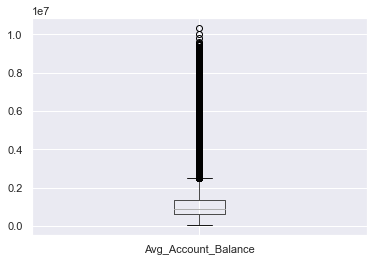

In [11]:
# Showing the outliers using A box and whiskers chart (boxplot)

# sns.boxplot(data=train_df, orient="v", palette="Set2")
# plt.show

train_df.boxplot(column=["Avg_Account_Balance"])
plt.show

Looking at the box plot, In the variable, "Avg_Account_Balance" has no outlier.

In [12]:
# Checking unique values from "train" data

for i in train_df:
    print(f'{i} unique values {train_df[i].unique()}')

ID unique values ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender unique values ['Female' 'Male']
Age unique values [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Region_Code unique values ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation unique values ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code unique values ['X3' 'X1' 'X2' 'X4']
Vintage unique values [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37

In [13]:
Train = train_df.drop(["Is_Lead"], axis=1)
Test = test_df
Train_Is_Lead = train_df["Is_Lead"]

# Numerical data distribution

In [14]:
# To do so lets first list all the types of our data from our dataset

list(set(Train.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [15]:
list(set(Test.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [16]:
Train_categorical = Train.select_dtypes(exclude = ['int64'])
Test_categorical = Test.select_dtypes(exclude = ['int64'])

Train_numerical = Train.select_dtypes(include = ['int64'])
col_names_Train = Train_numerical.columns.values.tolist()

Test_numerical = Test.select_dtypes(include = ['int64'])
col_names_Test = Test_numerical.columns.values.tolist()

In [17]:
Train_numerical.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


D:\Programfiles\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


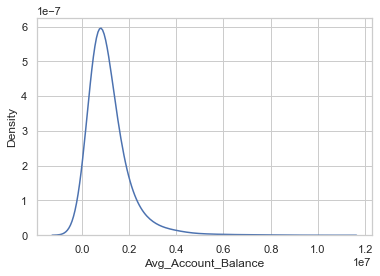

In [18]:
# Checking skewness of the dataset

sns.set_style('whitegrid')
sns.kdeplot(Train_numerical['Avg_Account_Balance'], bw=0.5)
plt.show()

D:\Programfiles\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


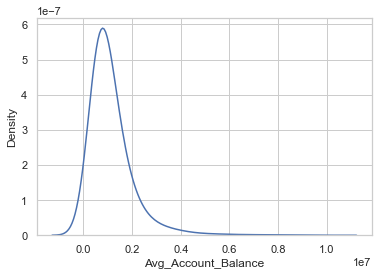

In [19]:
sns.set_style('whitegrid')
sns.kdeplot(Test_numerical['Avg_Account_Balance'], bw=0.5)
plt.show()

<ipython-input-20-a8d5ac8c82f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_numerical['Avg_Account_Balance'] = np.log(Train_numerical['Avg_Account_Balance'])


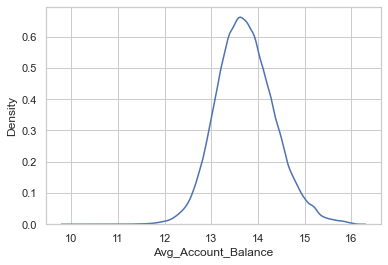

In [20]:
Train_numerical['Avg_Account_Balance'] = np.log(Train_numerical['Avg_Account_Balance'])
sns.kdeplot(Train_numerical['Avg_Account_Balance'])
plt.show()

<ipython-input-21-b69143d9550d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_numerical['Avg_Account_Balance'] = np.log(Test_numerical['Avg_Account_Balance'])


<function matplotlib.pyplot.show(close=None, block=None)>

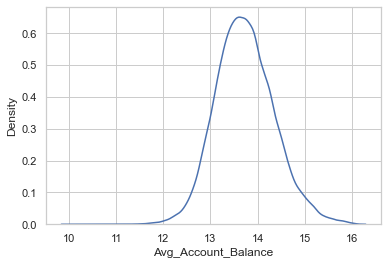

In [21]:
Test_numerical['Avg_Account_Balance'] = np.log(Test_numerical['Avg_Account_Balance'])
sns.kdeplot(Test_numerical['Avg_Account_Balance'])
plt.show

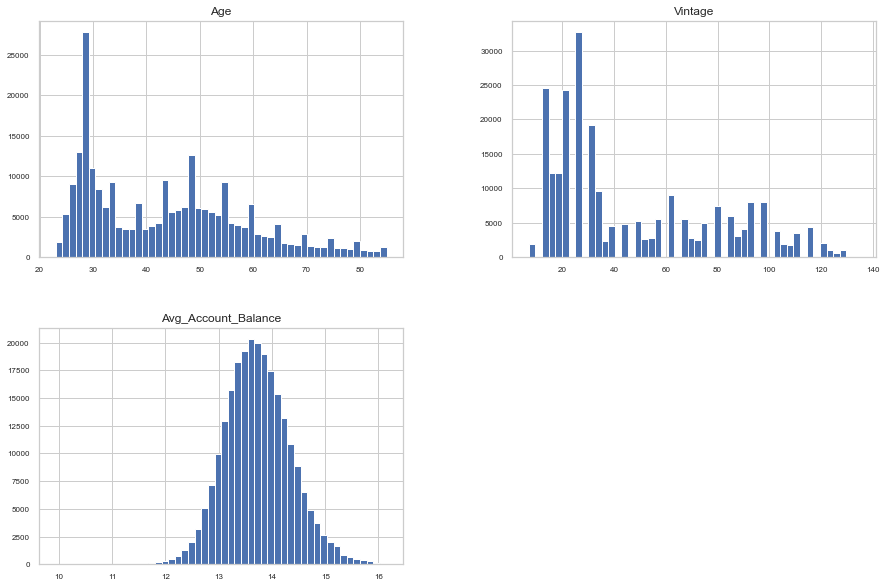

In [22]:
Train_numerical.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8);

# Normalizing and Scaling

In [23]:
# Using standard Scaler - data scaling.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Train_categorical = Train_categorical.apply(LabelEncoder().fit_transform)
Test_categorical = Test_categorical.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()

Train_numerical = scaler.fit_transform(Train_numerical.values)
Train_numerical = pd.DataFrame(Train_numerical, columns = col_names_Train)

Test_numerical = scaler.fit_transform(Test_numerical.values)
Test_numerical = pd.DataFrame(Test_numerical, columns = col_names_Test)

In [24]:
train_new_df = pd.concat([Train_categorical,pd.DataFrame(Train_numerical),Train_Is_Lead],axis=1)
test_new_df = pd.concat([Test_categorical,pd.DataFrame(Test_numerical)],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

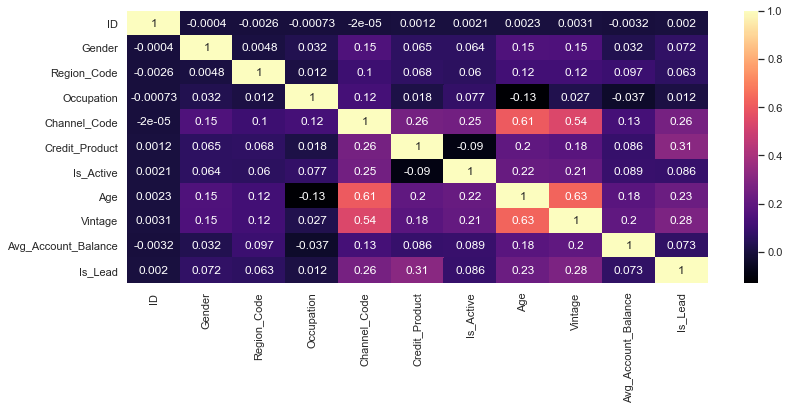

In [25]:
corr_train_df = train_new_df.corr()
plt.figure(figsize=(13,5)) 
sns.color_palette("magma", as_cmap=True)
ax = sns.heatmap(corr_train_df, annot=True, cmap="magma")
plt.show

In [26]:
train_new_df['Avg_Account_Balance'].agg(['skew', 'kurtosis']).transpose()

skew        0.235178
kurtosis    0.306033
Name: Avg_Account_Balance, dtype: float64

# Modelling

In [27]:
# Split the Train data into predictors and target

predictor_train = train_new_df.drop(['Is_Lead','ID'],axis=1)
predictor_test = test_new_df.drop(['ID'], axis =1)
target_train    = train_new_df['Is_Lead']

In [28]:
predictor_test.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age', 'Vintage', 'Avg_Account_Balance'],
      dtype='object')

In [29]:
# Scikit-Learn Pre-Processing Libraries
from sklearn.model_selection import KFold
# Model Evaluation Metric & Cross Validation Libraries
from sklearn.metrics import roc_auc_score
# Boosting Algorithm Librarie
import xgboost
from lightgbm import LGBMClassifier

In [30]:
#Creation ML Model,Fine Tune with MODEL Evaluation METRIC - "ROC_AUC" with k-FOLD Cross Validation and Predict Target "Response"
kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train)):    
    
    X_train, y_train = predictor_train.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    lg = LGBMClassifier(metric = 'auc', 
                       n_estimators=50000,    
                       bagging_fraction=0.95, 
                       subsample_freq = 2, 
                       objective ="binary",
                       importance_type = "gain",
                       verbosity = -1,
                       random_state=294,
                       num_leaves = 300,
                       boosting_type = 'gbdt',
                       learning_rate=0.15,
                       max_depth=4, 
                       scale_pos_weight=2,
                       n_jobs=-1 
                      )

    lg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val, y_val)] ,early_stopping_rounds=100 ,verbose=100)

    roc_auc = roc_auc_score(y_val,lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(lg.predict_proba(predictor_test[predictor_test.columns])[:, 1])
    
y_pred_final = np.mean(preds,axis=0)    
submission_df['Is_Lead']=y_pred_final


Fold: 1

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.877319	valid_1's auc: 0.876548
Early stopping, best iteration is:
[75]	training's auc: 0.87623	valid_1's auc: 0.876752

Fold: 2

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.877793	valid_1's auc: 0.869773
[200]	training's auc: 0.881146	valid_1's auc: 0.870174
[300]	training's auc: 0.883408	valid_1's auc: 0.870248
Early stopping, best iteration is:
[281]	training's auc: 0.883018	valid_1's auc: 0.87031

Fold: 3

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.877986

In [31]:
print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

ROC_AUC - CV Score: 0.8739769042600438 

Score :  [0.8767520355531739, 0.8703099271318708, 0.8709087326314434, 0.8704801685358794, 0.8750004743403552, 0.87280337217303, 0.8723549123118848, 0.8797835439527077, 0.87730903287024, 0.8740668430998538]


In [32]:
# Download and Show Submission File :
display("sample_submmission",submission_df)
sub_file_name_1 = "AV_Hackathon_Bank_Credit_Card_Predication.csv"
submission_df.to_csv(sub_file_name_1,index=False)
submission_df.head(5)

'sample_submmission'

,ID,Is_Lead
0,VBENBARO,0.096711
1,CCMEWNKY,0.919695
2,VK3KGA9M,0.125100
3,TT8RPZVC,0.039618
4,SHQZEYTZ,0.042721
...,...,...
105307,DBENJOYI,0.983489
105308,CWQ72DWS,0.730203
105309,HDESC8GU,0.137720
105310,2PW4SFCA,0.374671


,ID,Is_Lead
0,VBENBARO,0.096711
1,CCMEWNKY,0.919695
2,VK3KGA9M,0.125100
3,TT8RPZVC,0.039618
4,SHQZEYTZ,0.042721
